In [1]:
# パッケージインポート
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
import mca
import codecs
sns.set()
# 日本語を使うときは必要になる（今回は不必要）
font_path = 'C:\\Users\\ryousuke.kiridoshi\\Anaconda3\\envs\\yahtra\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\ipaexg.ttf'
font_prop = mpl.font_manager.FontProperties(fname=font_path)

In [2]:
import sys
'''
3.7.7 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
'''
print(sys.version)

3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
# バージョン確認
'''
numpy 1.18.1
scipy 1.4.1
matplotlib 3.1.3
seaborn 0.10.0
pandas 1.0.3
sklearn 0.22.1
mlxtend 0.17.3
networkx 2.5
mca 1.0.3
'''
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('matplotlib', mpl.__version__)
print('seaborn', sns.__version__)
print('pandas', pd.__version__)
print('sklearn', sklearn.__version__)
print('mlxtend', mlxtend.__version__)
print('networkx', nx.__version__)
print('mca', '1.0.3')

numpy 1.18.1
scipy 1.4.1
matplotlib 3.1.3
seaborn 0.10.0
pandas 1.0.3
sklearn 0.22.1
mlxtend 0.17.3
networkx 2.5
mca 1.0.3


In [4]:
# pathの確認
path = os.getcwd()
print(path)

C:\Users\ryousuke.kiridoshi


# アソシエーション

In [5]:
with codecs.open('superstore_dataset2011-2015.csv', "r", "shift-jis", "ignore") as f:
    df = pd.read_csv(f, parse_dates=['Order Date','Ship Date'], dayfirst=True)
# 後の処理のために一部のカラムを加工しておく
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Country']='Country_'+df['Country']
df['Sub-Category']='SubC_'+df['Sub-Category']
# 処理が重かったので、8割くらいのデータは捨てる
df, gomi=train_test_split(df, test_size=0.8, random_state=0)
display(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
7134,17391,ES-2012-5845607,2012-05-11,2012-05-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Las Rozas de Madrid,Madrid,...,OFF-LA-10004737,Office Supplies,SubC_Labels,"Avery Shipping Labels, 5000 Label Set",110.16,9,0.0,41.85,8.11,Medium
41319,19799,ES-2012-2599182,2012-09-25,2012-10-01,Standard Class,PB-19150,Philip Brown,Consumer,Halle,North Rhine-Westphalia,...,OFF-EN-10003080,Office Supplies,SubC_Envelopes,"Kraft Peel and Seal, Security-Tint",91.56,4,0.0,14.64,7.47,Medium
22482,10447,ES-2013-2926991,2013-06-14,2013-06-21,Standard Class,SR-20740,Steven Roelle,Home Office,Madrid,Madrid,...,TEC-CO-10001926,Technology,SubC_Copiers,"Hewlett Wireless Fax, Laser",760.38,2,0.0,235.68,43.43,Medium
43101,5683,MX-2012-143987,2012-09-26,2012-10-01,Second Class,CS-12490,Cindy Schnelling,Corporate,Juazeiro,Bahia,...,FUR-CH-10001914,Furniture,SubC_Chairs,"Harbour Creations Bag Chairs, Black",197.30,5,0.0,39.40,7.23,Medium
15818,42512,SF-2014-1760,2014-09-05,2014-09-10,Standard Class,JM-6195,Justin MacKendrick,Consumer,Rustenburg,North-West,...,FUR-TEN-10003923,Furniture,SubC_Furnishings,"Tenex Door Stop, Duo Pack",175.80,4,0.0,79.08,12.02,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,46622,TZ-2011-8610,2011-10-13,2011-10-18,Standard Class,NK-8490,Neil Knudson,Home Office,Chalinze,Pwani,...,TEC-MEM-10001409,Technology,SubC_Accessories,"Memorex Keyboard, Bluetooth",71.34,1,0.0,9.96,5.77,Medium
45891,18710,ES-2014-1082027,2014-02-28,2014-03-04,Standard Class,IM-15055,Ionia McGrath,Consumer,Colombes,Ile-de-France,...,OFF-AR-10000711,Office Supplies,SubC_Art,"BIC Pens, Easy-Erase",43.65,3,0.0,9.54,0.09,Medium
42613,48334,SA-2012-3380,2012-06-26,2012-06-30,Standard Class,SC-10260,Scott Cohen,Corporate,Jeddah,Makkah,...,OFF-IBI-10002637,Office Supplies,SubC_Binders,"Ibico Binding Machine, Durable",52.92,1,0.0,24.33,6.20,High
43567,29712,IN-2014-15011,2014-11-26,2014-12-02,Standard Class,MC-17635,Matthew Clasen,Corporate,Udaipur,Tripura,...,FUR-FU-10002659,Furniture,SubC_Furnishings,"Eldon Clock, Black",113.04,2,0.0,38.40,10.52,Medium


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10258 entries, 7134 to 2732
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10258 non-null  int64         
 1   Order ID        10258 non-null  object        
 2   Order Date      10258 non-null  datetime64[ns]
 3   Ship Date       10258 non-null  datetime64[ns]
 4   Ship Mode       10258 non-null  object        
 5   Customer ID     10258 non-null  object        
 6   Customer Name   10258 non-null  object        
 7   Segment         10258 non-null  object        
 8   City            10258 non-null  object        
 9   State           10258 non-null  object        
 10  Country         10258 non-null  object        
 11  Postal Code     1985 non-null   float64       
 12  Market          10258 non-null  object        
 13  Region          10258 non-null  object        
 14  Product ID      10258 non-null  object        
 15  

In [7]:
print('Customer ID', df['Customer ID'].unique().shape[0])
print('Category', df['Category'].unique().shape[0])
print(df['Category'].unique())
print('Sub-Category', df['Sub-Category'].unique().shape[0])
print('Product Name', df['Product Name'].unique().shape[0])
print('Region', df['Region'].unique().shape[0])
print('Market', df['Market'].unique().shape[0])
print('Country', df['Country'].unique().shape[0])
print('State', df['State'].unique().shape[0])
print('City', df['City'].unique().shape[0])

Customer ID 1493
Category 3
['Office Supplies' 'Technology' 'Furniture']
Sub-Category 17
Product Name 3038
Region 13
Market 7
Country 137
State 891
City 2431


In [8]:
# Customer IDごとのCountryのdfとCustomer IDごとのSub-Categoryのdfをconcatしてエンコードする
# エンコードは昇順で番号が付けられていく
ro='Country'
co='Sub-Category'
def create_city_product_matrix(df):
    df_store=df.groupby(['Customer ID',ro,'Order Date'])[[co]].count().reset_index()
    df_product=df.groupby(['Customer ID',co,'Order Date'])[[ro]].count().reset_index()
    df_concat=pd.concat([df_store[['Customer ID',ro,'Order Date']].rename(columns={ro:co}),df_product[['Customer ID',co,'Order Date']]])
    df_concat=df_concat.sort_values(by=['Customer ID','Order Date',co])
    le = LabelEncoder()
    encoded = le.fit_transform(df_concat[co].values)
    df_concat['encoded'] = encoded
    return df_concat[['Customer ID',co,'encoded']], le

In [9]:
# city_cnt:国のユニーク数(後の処理で使う);エンコード後の番号のCountryとSub-Categoryの分かれ目の数字
city_cnt=df[ro].unique().shape[0]

df_label,le=create_city_product_matrix(df)
df_label['flg']=1
display(df_label)

,Customer ID,Sub-Category,encoded,flg
6,AA-10315,Country_United States,129,1
0,AA-10315,SubC_Binders,140,1
1,AA-10315,Country_Philippines,94,1
9,AA-10315,SubC_Supplies,152,1
7,AA-10315,Country_United States,129,1
...,...,...,...,...
10066,ZD-21925,SubC_Fasteners,145,1
8559,ZD-21925,Country_United States,129,1
10068,ZD-21925,SubC_Furnishings,146,1
8557,ZD-21925,Country_Mexico,75,1


In [8]:
# Customer IDごとにエンコードした数字をlist化
df_list = df_label.groupby(["Customer ID"])["encoded"].apply(lambda x:list(x)).reset_index()
display(df_list)

,Customer ID,encoded
0,AA-10315,"[129, 140, 94, 152, 129, 146, 110, 141, 129, 1..."
1,AA-10375,"[84, 141, 129, 146, 58, 142, 0, 146]"
2,AA-10480,"[75, 142, 53, 140, 6, 143]"
3,AA-10645,"[75, 145, 58, 147, 53, 137, 26, 137, 53, 147, ..."
4,AA-315,"[123, 151]"
...,...,...
1488,YS-21880,"[85, 141, 38, 139, 146, 85, 138, 49, 141, 4, 1..."
1489,ZC-11910,"[87, 149]"
1490,ZC-21910,"[42, 139, 149, 129, 142, 42, 140, 53, 142, 129..."
1491,ZD-11925,"[123, 144, 87, 143, 103, 140]"


In [9]:
# アソシエーション分析のためのマート作成
te = TransactionEncoder()
te_ary = te.fit(df_list['encoded']).transform(df_list['encoded'])
df_mart = pd.DataFrame(te_ary, columns=te.columns_)
#df_mart.columns=le.inverse_transform(df_mart.columns.values)
display(df_mart)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,True,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,True,True,False
1489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1490,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,True,True,True,True,True,False
1491,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [12]:
# 支持度5%以上のitemに絞る
min_support=0.05
frequent_itemsets = fpgrowth(df_mart,min_support=min_support,use_colnames=True)
# アソシエーション分析実行
rules = association_rules(frequent_itemsets,metric='support',min_threshold=min_support)
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SubC_Binders),(Country_United States),0.529806,0.460147,0.328868,0.620733,1.348988,0.085079,1.423411
1,(Country_United States),(SubC_Binders),0.460147,0.529806,0.328868,0.714702,1.348988,0.085079,1.648079
2,(Country_United States),(SubC_Art),0.460147,0.461487,0.267247,0.580786,1.258510,0.054895,1.284578
3,(SubC_Art),(Country_United States),0.461487,0.460147,0.267247,0.579100,1.258510,0.054895,1.282615
4,"(SubC_Binders, Country_United States)",(SubC_Art),0.328868,0.461487,0.196249,0.596741,1.293084,0.044481,1.335404
...,...,...,...,...,...,...,...,...,...
17417,(SubC_Bookcases),"(Country_Brazil, Country_United States)",0.255861,0.126591,0.052914,0.206806,1.633660,0.020524,1.101130
17418,(Country_United States),(Country_Honduras),0.460147,0.077026,0.064300,0.139738,1.814164,0.028857,1.072899
17419,(Country_Honduras),(Country_United States),0.077026,0.460147,0.064300,0.834783,1.814164,0.028857,3.267529
17420,(SubC_Binders),(Country_Honduras),0.529806,0.077026,0.054253,0.102402,1.329445,0.013444,1.028271


In [13]:
# アソシエーション分析実行
rules = association_rules(frequent_itemsets,metric='support',min_threshold=min_support)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SubC_Binders),(Country_United States),0.529806,0.460147,0.328868,0.620733,1.348988,0.085079,1.423411
1,(Country_United States),(SubC_Binders),0.460147,0.529806,0.328868,0.714702,1.348988,0.085079,1.648079
2,(Country_United States),(SubC_Art),0.460147,0.461487,0.267247,0.580786,1.258510,0.054895,1.284578
3,(SubC_Art),(Country_United States),0.461487,0.460147,0.267247,0.579100,1.258510,0.054895,1.282615
4,"(SubC_Binders, Country_United States)",(SubC_Art),0.328868,0.461487,0.196249,0.596741,1.293084,0.044481,1.335404
...,...,...,...,...,...,...,...,...,...
17417,(SubC_Bookcases),"(Country_Brazil, Country_United States)",0.255861,0.126591,0.052914,0.206806,1.633660,0.020524,1.101130
17418,(Country_United States),(Country_Honduras),0.460147,0.077026,0.064300,0.139738,1.814164,0.028857,1.072899
17419,(Country_Honduras),(Country_United States),0.077026,0.460147,0.064300,0.834783,1.814164,0.028857,3.267529
17420,(SubC_Binders),(Country_Honduras),0.529806,0.077026,0.054253,0.102402,1.329445,0.013444,1.028271


In [11]:
# 条件部にCounty、結論部にSub-Categoryが来るようにrulesを抽出
labels_no_frozen=[i for i in rules['antecedents'].values]
labels_no=[list(i) for i in rules['antecedents'].values]
consequents_no_frozen=[i for i in rules['consequents'].values]
consequents_no=[list(i) for i in rules['consequents'].values]
city_labels=[]
product_labels=[]
for i,k,l,n in zip(labels_no,labels_no_frozen,consequents_no,consequents_no_frozen):
    for j in i:
        # city_cnt-1以下 = Countryのエンコード後の番号
        if j <= city_cnt-1:
            for m in l:
                # city_cnt-1より大きい = Sub-Categoryのエンコード後の番号
                if m > city_cnt-1:
                    # County番号を追加
                    city_labels.append(k)
                    # Sub-Category番号を追加
                    product_labels.append(n)
                    break
                break

rules1=rules[(rules['antecedents'].isin(city_labels))&(rules['consequents'].isin(product_labels))&(rules["antecedents"].apply(lambda x: len(x))==1)&(rules["consequents"].apply(lambda x: len(x))==1)]
max_support=rules1['support'].max()
print('max_support',max_support)
display(rules1)

max_support 0.32886805090421967


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(129),(140),0.460147,0.529806,0.328868,0.714702,1.348988,0.085079,1.648079
2,(129),(139),0.460147,0.461487,0.267247,0.580786,1.258510,0.054895,1.284578
10,(129),(150),0.460147,0.330877,0.234427,0.509461,1.539729,0.082175,1.364057
340,(129),(146),0.460147,0.312123,0.231078,0.502183,1.608927,0.087456,1.381788
1374,(129),(147),0.460147,0.281983,0.196249,0.426492,1.512476,0.066496,1.251975
...,...,...,...,...,...,...,...,...,...
17144,(16),(145),0.148694,0.277964,0.062960,0.423423,1.523304,0.021629,1.252281
17148,(16),(143),0.148694,0.244474,0.054923,0.369369,1.510873,0.018571,1.198048
17150,(16),(147),0.148694,0.281983,0.061621,0.414414,1.469645,0.019692,1.226153
17152,(16),(141),0.148694,0.255861,0.062291,0.418919,1.637293,0.024246,1.280612


In [12]:
# 条件部にも結論部にもSub-Categoryが来るようにrulesを抽出
labels_no_frozen=[i for i in rules['antecedents'].values]
labels_no=[list(i) for i in rules['antecedents'].values]
consequents_no_frozen=[i for i in rules['consequents'].values]
consequents_no=[list(i) for i in rules['consequents'].values]
city_labels=[]
product_labels=[]
for i,k,l,n in zip(labels_no,labels_no_frozen,consequents_no,consequents_no_frozen):
    for m in l:
        # city_cnt-1より大きい = Sub-Categoryのエンコード後の番号
        if m > city_cnt-1:
            city_labels.append(k)
            product_labels.append(n)
            break
        break

rules11=rules[(rules['antecedents'].isin(product_labels))&(rules['consequents'].isin(product_labels))&(rules["antecedents"].apply(lambda x: len(x))==1)&(rules["consequents"].apply(lambda x: len(x))==1)&(rules['support']<=max_support)]
display(rules11)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(140),(150),0.529806,0.330877,0.213664,0.403287,1.218841,0.038363,1.121347
13,(150),(140),0.330877,0.529806,0.213664,0.645749,1.218841,0.038363,1.327291
14,(139),(150),0.461487,0.330877,0.180844,0.391872,1.184343,0.028148,1.100299
15,(150),(139),0.330877,0.461487,0.180844,0.546559,1.184343,0.028148,1.187614
16,(150),(151),0.330877,0.445412,0.177495,0.536437,1.204362,0.030118,1.196360
...,...,...,...,...,...,...,...,...,...
16581,(150),(138),0.330877,0.210985,0.082384,0.248988,1.180123,0.012574,1.050603
16584,(144),(138),0.262559,0.210985,0.069658,0.265306,1.257467,0.014263,1.073938
16585,(138),(144),0.210985,0.262559,0.069658,0.330159,1.257467,0.014263,1.100920
16586,(138),(143),0.210985,0.244474,0.068319,0.323810,1.324514,0.016739,1.117327


In [13]:
# アソシエーション分析の結果の表を作る
def create_association_matrix(rules1):
    # rules1のantecedentsをデコード
    antecedents_scale=pd.DataFrame(le.inverse_transform([list(i)[0] for i in rules1['antecedents'].unique()]),columns=[co])
    antecedents_scale['antecedents']=[i for i in rules1['antecedents'].unique()]

    # rules1のconsequentsをデコード
    # 一応複数の組み合わせがあっても大丈夫なようにしている
    consequents=[list(i) for i in rules1['consequents'].unique()]
    consequents=[([le.inverse_transform([i])[0] for i in j]) for j in consequents]
    consequents_scale=pd.DataFrame(consequents,columns=[co])
    consequents_scale['consequents']=[i for i in rules1['consequents'].unique()]

    rules3=pd.merge(rules1, antecedents_scale, on=['antecedents'], how='left').rename(columns={co:'antecedents_name'})
    rules3=pd.merge(rules3, consequents_scale, on=['consequents'], how='left').rename(columns={co:'consequents_name'})
    rules3=rules3.reindex(columns=['antecedents_name','consequents_name','support','confidence','lift','antecedents','consequents'])
    return rules3

In [14]:
rules3=create_association_matrix(rules1)
rules33=create_association_matrix(rules11)
display(rules3)
display(rules33)

,antecedents_name,consequents_name,support,confidence,lift,antecedents,consequents
0,Country_United States,SubC_Binders,0.328868,0.714702,1.348988,(129),(140)
1,Country_United States,SubC_Art,0.267247,0.580786,1.258510,(129),(139)
2,Country_United States,SubC_Phones,0.234427,0.509461,1.539729,(129),(150)
3,Country_United States,SubC_Furnishings,0.231078,0.502183,1.608927,(129),(146)
4,Country_United States,SubC_Labels,0.196249,0.426492,1.512476,(129),(147)
...,...,...,...,...,...,...,...
181,Country_Brazil,SubC_Fasteners,0.062960,0.423423,1.523304,(16),(145)
182,Country_Brazil,SubC_Copiers,0.054923,0.369369,1.510873,(16),(143)
183,Country_Brazil,SubC_Labels,0.061621,0.414414,1.469645,(16),(147)
184,Country_Brazil,SubC_Bookcases,0.062291,0.418919,1.637293,(16),(141)


,antecedents_name,consequents_name,support,confidence,lift,antecedents,consequents
0,SubC_Binders,SubC_Phones,0.213664,0.403287,1.218841,(140),(150)
1,SubC_Phones,SubC_Binders,0.213664,0.645749,1.218841,(150),(140)
2,SubC_Art,SubC_Phones,0.180844,0.391872,1.184343,(139),(150)
3,SubC_Phones,SubC_Art,0.180844,0.546559,1.184343,(150),(139)
4,SubC_Phones,SubC_Storage,0.177495,0.536437,1.204362,(150),(151)
...,...,...,...,...,...,...,...
249,SubC_Phones,SubC_Appliances,0.082384,0.248988,1.180123,(150),(138)
250,SubC_Envelopes,SubC_Appliances,0.069658,0.265306,1.257467,(144),(138)
251,SubC_Appliances,SubC_Envelopes,0.069658,0.330159,1.257467,(138),(144)
252,SubC_Appliances,SubC_Copiers,0.068319,0.323810,1.324514,(138),(143)


In [17]:
# Countryごとの人数をカウント
def create_country_uu(df_label):
    count_UU=df_label.groupby([co,'Customer ID'])[['flg']].count().reset_index()
    count_UU['cnt']=1
    count_UU=count_UU.groupby([co])[['cnt']].sum().reset_index()
    return count_UU

# ノード、エッジを作る
GA=nx.from_pandas_edgelist(rules1[['antecedents','consequents','lift']],source='antecedents',target='consequents', edge_attr=True)

count_UU=create_country_uu(df_label)
count_UU_mst=pd.DataFrame(le.inverse_transform([list(i)[0] for i, j in GA.nodes(data=True) if i in rules1['antecedents'].values]),columns=[co])
count_UU_mst=pd.merge(count_UU_mst, count_UU, on=[co],how='left').rename(columns={co:ro})

# ノードのマスタを作る(デコード)
labels_no=[list(j) for j in [i for i in GA.nodes]]
labels=[]
for no in labels_no:
    labesl2=[]
    for label in no:
        labesl2.append(le.inverse_transform([label])[0])
    labels.append(labesl2)

new_labels2={}
for i, j in zip(GA.nodes, labels):
    new_labels2[i]=j

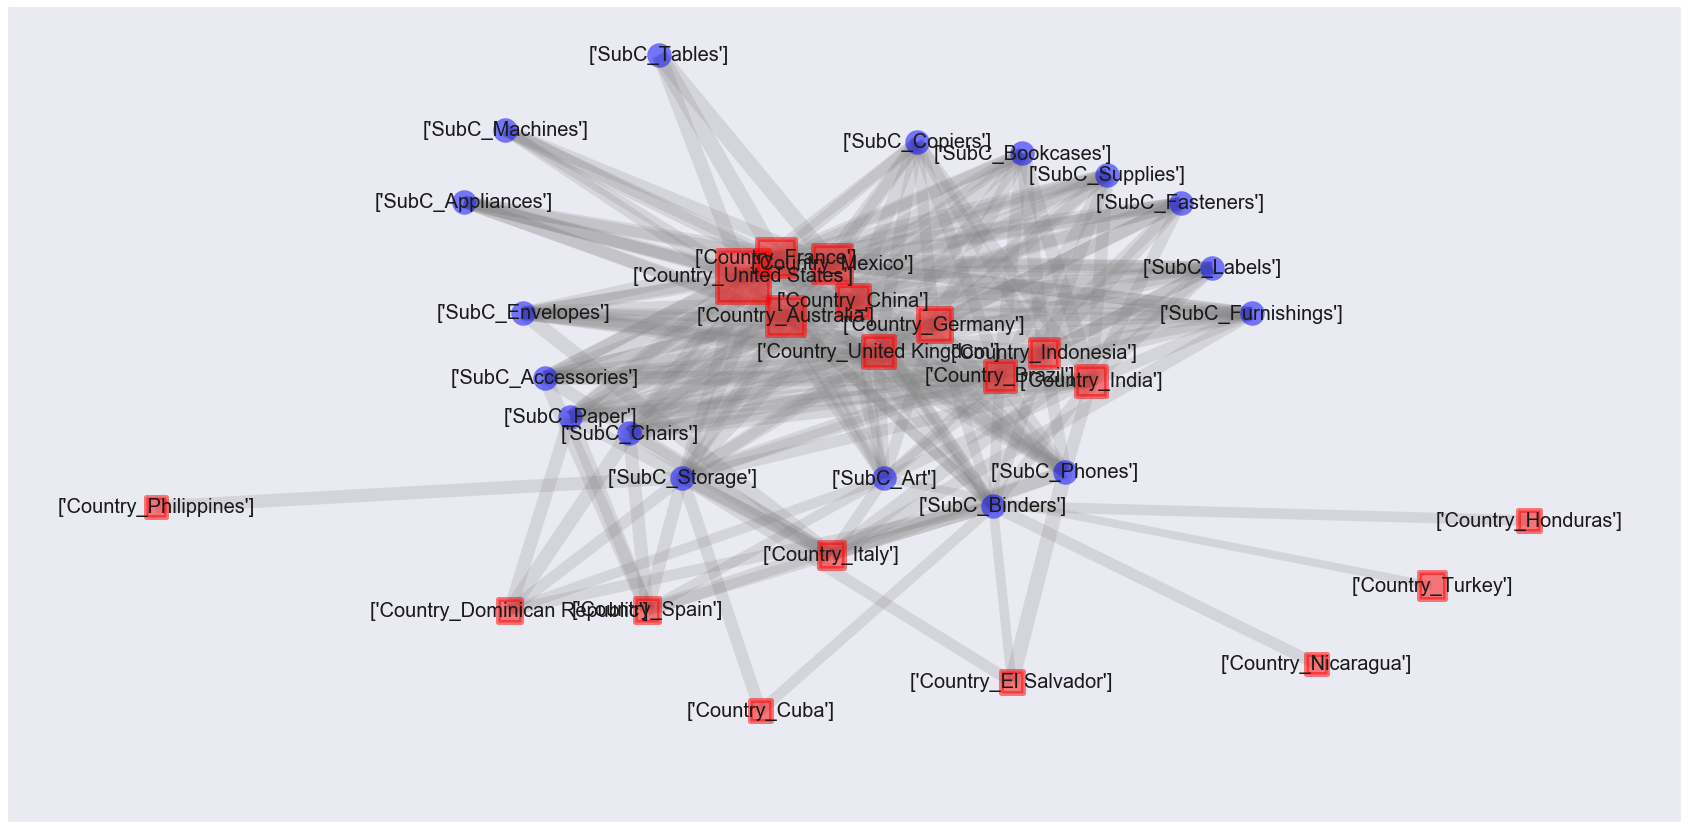

In [18]:
# アソシエーション分析の結果をネットワーク図で表現
def association_network(GA, rules1, count_UU_mst):
    fig, ax=plt.subplots(figsize=(30,15))
    pos = nx.kamada_kawai_layout(GA,scale=0.06)

    # エッジの太さはリフト値に比例させる
    edge_width = [d['lift']*8 for (u,v,d) in GA.edges(data=True)]

    # Countryを正方形でプロット
    # ノードサイズはCountryごとのUU数に比例させる
    nx.draw_networkx_nodes(GA, pos, alpha=0.5, node_shape="s", linewidths=5, node_color='red',
                           nodelist=[i for i, j in GA.nodes(data=True) if i in rules1['antecedents'].values],
                           node_size=[4.*v for v in count_UU_mst['cnt'].values])

    # Sub-Categoryを円形でプロット
    nx.draw_networkx_nodes(GA, pos, alpha=0.5, node_shape="o", linewidths=0, node_color='blue', node_size=600,
                           nodelist=[i for i, j in GA.nodes(data=True) if i in rules1['consequents'].values])

    # エッジをプロット
    nx.draw_networkx_edges(GA, pos, alpha=0.2, edge_color='grey', width=edge_width)
    #ラベルの設置をする
    datas = nx.draw_networkx_labels(GA,pos,new_labels2,font_size=20)

    # 日本語に対応できるようにするため、日本語が使えるフォントを設定
    #for t in datas.values():
    #    t.set_fontproperties(font_prop)

    plt.grid(False)
    plt.show()

association_network(GA, rules1, count_UU_mst)

# コレスポンデンス分析

In [19]:
# CountryとSub-Categoryの売り上げのクロス表を作る
df_corre=df.copy()
df_corre=df_corre.pivot_table(index=ro, columns=co, values='Sales', aggfunc=lambda x:x.sum()).fillna(0)
display(df_corre)

Sub-Category,SubC_Accessories,SubC_Appliances,SubC_Art,SubC_Binders,SubC_Bookcases,SubC_Chairs,SubC_Copiers,SubC_Envelopes,SubC_Fasteners,SubC_Furnishings,SubC_Labels,SubC_Machines,SubC_Paper,SubC_Phones,SubC_Storage,SubC_Supplies,SubC_Tables
Country,,,,,,,,,,,,,,,,,
Country_Afghanistan,141.9000,0.0000,160.2000,322.9800,2070.1500,0.0000,0.00000,0.0000,45.3600,194.9400,0.0000,346.3200,0.000,848.4000,0.0000,151.200,1447.5600
Country_Albania,0.0000,0.0000,0.0000,0.0000,363.7500,0.0000,0.00000,0.0000,0.0000,58.1700,0.0000,85.2600,0.000,553.9200,0.0000,0.000,0.0000
Country_Algeria,95.2800,2163.7200,83.7000,439.5000,1447.4400,579.8700,2392.26000,118.3500,53.5200,368.1300,5.0400,1401.9000,159.960,166.8300,262.3800,43.050,319.7700
Country_Angola,102.4800,0.0000,27.9300,113.4900,2478.6000,182.3700,239.04000,103.0500,26.2200,777.9000,152.0400,50.0400,110.160,0.0000,1746.6900,47.040,0.0000
Country_Argentina,249.0840,755.9160,241.1640,108.2760,1050.0360,2747.0280,2644.51148,527.0160,42.6840,250.1640,101.7240,0.0000,58.992,1636.3440,949.0200,118.644,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_Venezuela,764.1360,382.3080,148.3800,44.5560,749.8560,62.3160,1178.69388,124.3680,13.6560,345.5160,0.0000,0.0000,95.160,764.9280,635.3400,149.424,0.0000
Country_Vietnam,424.1484,3247.2339,89.2665,225.3201,2126.9304,649.4445,2022.43230,248.9004,16.9818,880.3143,184.3845,671.9265,197.706,488.9364,1516.3104,125.496,514.4004
Country_Yemen,0.0000,0.0000,84.3840,3.4380,0.0000,0.0000,213.55200,12.2850,0.0000,28.1520,0.0000,0.0000,0.000,0.0000,0.0000,21.222,0.0000


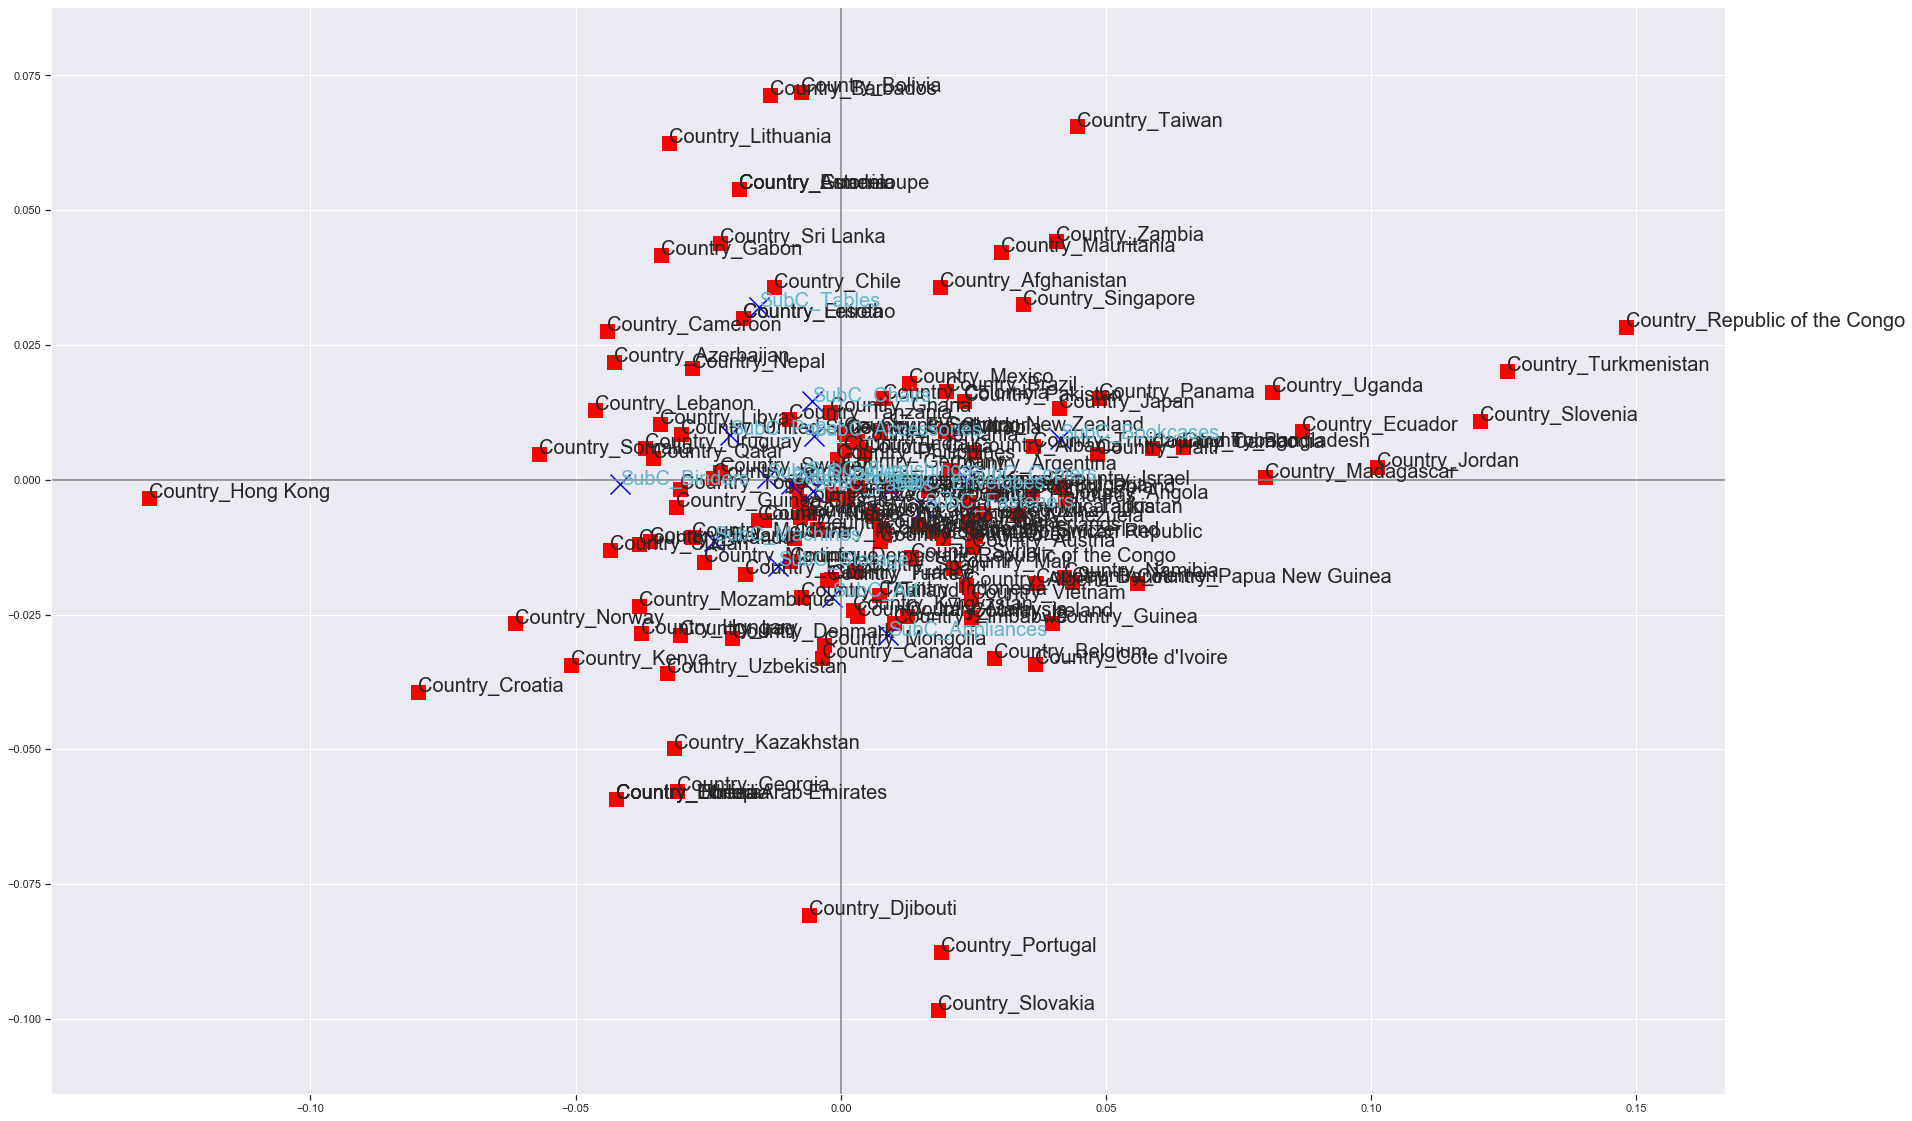

In [20]:
# コレスポンデンス分析をプロット
fig, ax=plt.subplots(figsize=(30,20))

mca_counts = mca.MCA(df_corre)
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

ax.scatter(rows[:,0], rows[:,1], c='red',marker='s', s=200)
labels = df_corre.index.values
for label,x,y in zip(labels,rows[:,0],rows[:,1]):
        ax.annotate(label,xy = (x, y),fontsize=20)

ax.scatter(cols[:,0], cols[:,1], c='blue',marker='x', s=400)
labels = df_corre.columns.values
for label,x,y in zip(labels,cols[:,0],cols[:,1]):
        ax.annotate(label,xy = (x, y),fontsize=20, color='c')

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
plt.show()

In [29]:
mca_counts = mca.MCA(df_corre)
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

In [21]:
# コレスポンデンス分析とアソシエーション分析の結果をnetwork図で表現
def mca_association_plot(df_corre, df_label, rows, cols, new_labels2
                         , strong_node_row=None, strong_node_col=None
                         , xlim=[None, None], ylim=[None, None]):
    fig, ax=plt.subplots(figsize=(30,20))
    uu_list=create_country_uu(df_label)

    # Countryを赤い四角でプロット
    G = nx.Graph()
    node_weights=[]
    for node, pos in zip(df_corre.index, rows):
        if strong_node_row is None:
            G.add_node(node)
            G.nodes[node]["pos"] = (pos[0], pos[1])
            node_weights.append(uu_list[uu_list[co]==node]['cnt'].values[0])
        else:
            if node in strong_node_row:
                G.add_node(node)
                G.nodes[node]["pos"] = (pos[0], pos[1])
                node_weights.append(uu_list[uu_list[co]==node]['cnt'].values[0])
    position=np.array([v['pos'] for (u,v) in G.nodes(data=True)])
    pos = {n:(i[0], i[1]) for i, n in zip(position ,G.nodes)}
    nx.draw_networkx(G, pos=pos, node_color="red",ax=ax, linewidths=5, node_shape="s", node_size=[1.5*v for v in node_weights], alpha=0.5)
    new_labels2={}
    for i, j in zip(G.nodes, G.nodes):
        new_labels2[i]=j
    datas = nx.draw_networkx_labels(G,pos, new_labels2, font_size=20, font_color='k')
    #日本語に対応できるようにするため、日本語が使えるフォントを設定している
    #for t in datas.values():
    #    t.set_fontproperties(font_prop)

    # Sub-Categoryを青いバツ印でプロット    
    G2 = nx.Graph()
    node_weights2=[]
    for node, pos in zip(df_corre.columns, cols):
        if strong_node_col is None:
            G2.add_node(node)
            G2.nodes[node]["pos"] = (pos[0], pos[1])
            node_weights2.append(uu_list[uu_list[co]==node]['cnt'].values[0])
        else:
            if node in strong_node_col:
                G2.add_node(node)
                G2.nodes[node]["pos"] = (pos[0], pos[1])
                node_weights2.append(uu_list[uu_list[co]==node]['cnt'].values[0])
    position2=np.array([v['pos'] for (u,v) in G2.nodes(data=True)])
    pos2 = {n:(i[0], i[1]) for i, n in zip(position2 ,G2.nodes)}
    nx.draw_networkx(G2, pos=pos2, node_color="blue",ax=ax, node_shape="x", node_size=[5*v for v in node_weights2], alpha=0.5)
    new_labels2={}
    for i, j in zip(G2.nodes, G2.nodes):
        new_labels2[i]=j
    datas = nx.draw_networkx_labels(G2,pos2, new_labels2, font_size=20, font_color='b')
    #日本語に対応できるようにするため、日本語が使えるフォントを設定している
    #for t in datas.values():
    #    t.set_fontproperties(font_prop)

    # CountryとSub-Categoryの間のエッジをプロット（灰色でリフト値に比例して太くなる）
    U=nx.Graph()
    U.add_nodes_from(G.nodes(data=True)) #deals with isolated nodes
    U.add_nodes_from(G2.nodes(data=True))
    for edge1, edge2, lift in zip(rules3[rules3['lift']>=1.6]['antecedents_name'].values, rules3[rules3['lift']>=1.6]['consequents_name'].values, rules3[rules3['lift']>=1.6]['lift'].values):
        if strong_node_col is None:
            U.add_edge(edge1, edge2, lift=lift)
        else:
            if edge2 in strong_node_col:
                U.add_edge(edge1, edge2, lift=lift)
    pos_all = {n:(i[0], i[1]) for i, n in zip(np.vstack((position, position2)) ,U.nodes)}
    edge_width = [d['lift']*8. for (u,v,d) in U.edges(data=True)]
    nx.draw_networkx_edges(U, pos=pos_all, alpha=0.3, edge_color='grey', width=edge_width, ax=ax)

    # Sub-CategoryとSub-Categoryの間のエッジをプロット（水色でリフト値に比例して太くなる）
    V=nx.Graph()
    V.add_nodes_from(G.nodes(data=True)) #deals with isolated nodes
    V.add_nodes_from(G2.nodes(data=True))
    for edge1, edge2, lift in zip(rules33[rules33['lift']>=1.5]['antecedents_name'].values, rules33[rules33['lift']>=1.5]['consequents_name'].values, rules33[rules33['lift']>=1.5]['lift'].values):
        if strong_node_col is None:
            V.add_edge(edge1, edge2, lift=lift)
        else:
            if edge1 in strong_node_col and edge2 in strong_node_col:
                V.add_edge(edge1, edge2, lift=lift)
    pos_all2 = {n:(i[0], i[1]) for i, n in zip(np.vstack((position, position2)) ,V.nodes)}
    edge_width = [d['lift']*8. for (u,v,d) in V.edges(data=True)]
    nx.draw_networkx_edges(V, pos=pos_all2, alpha=0.2, edge_color='c', width=edge_width ,ax=ax)

    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    ax.axhline(0, color='gray')
    ax.axvline(0, color='gray')
    plt.grid(True)
    plt.show()

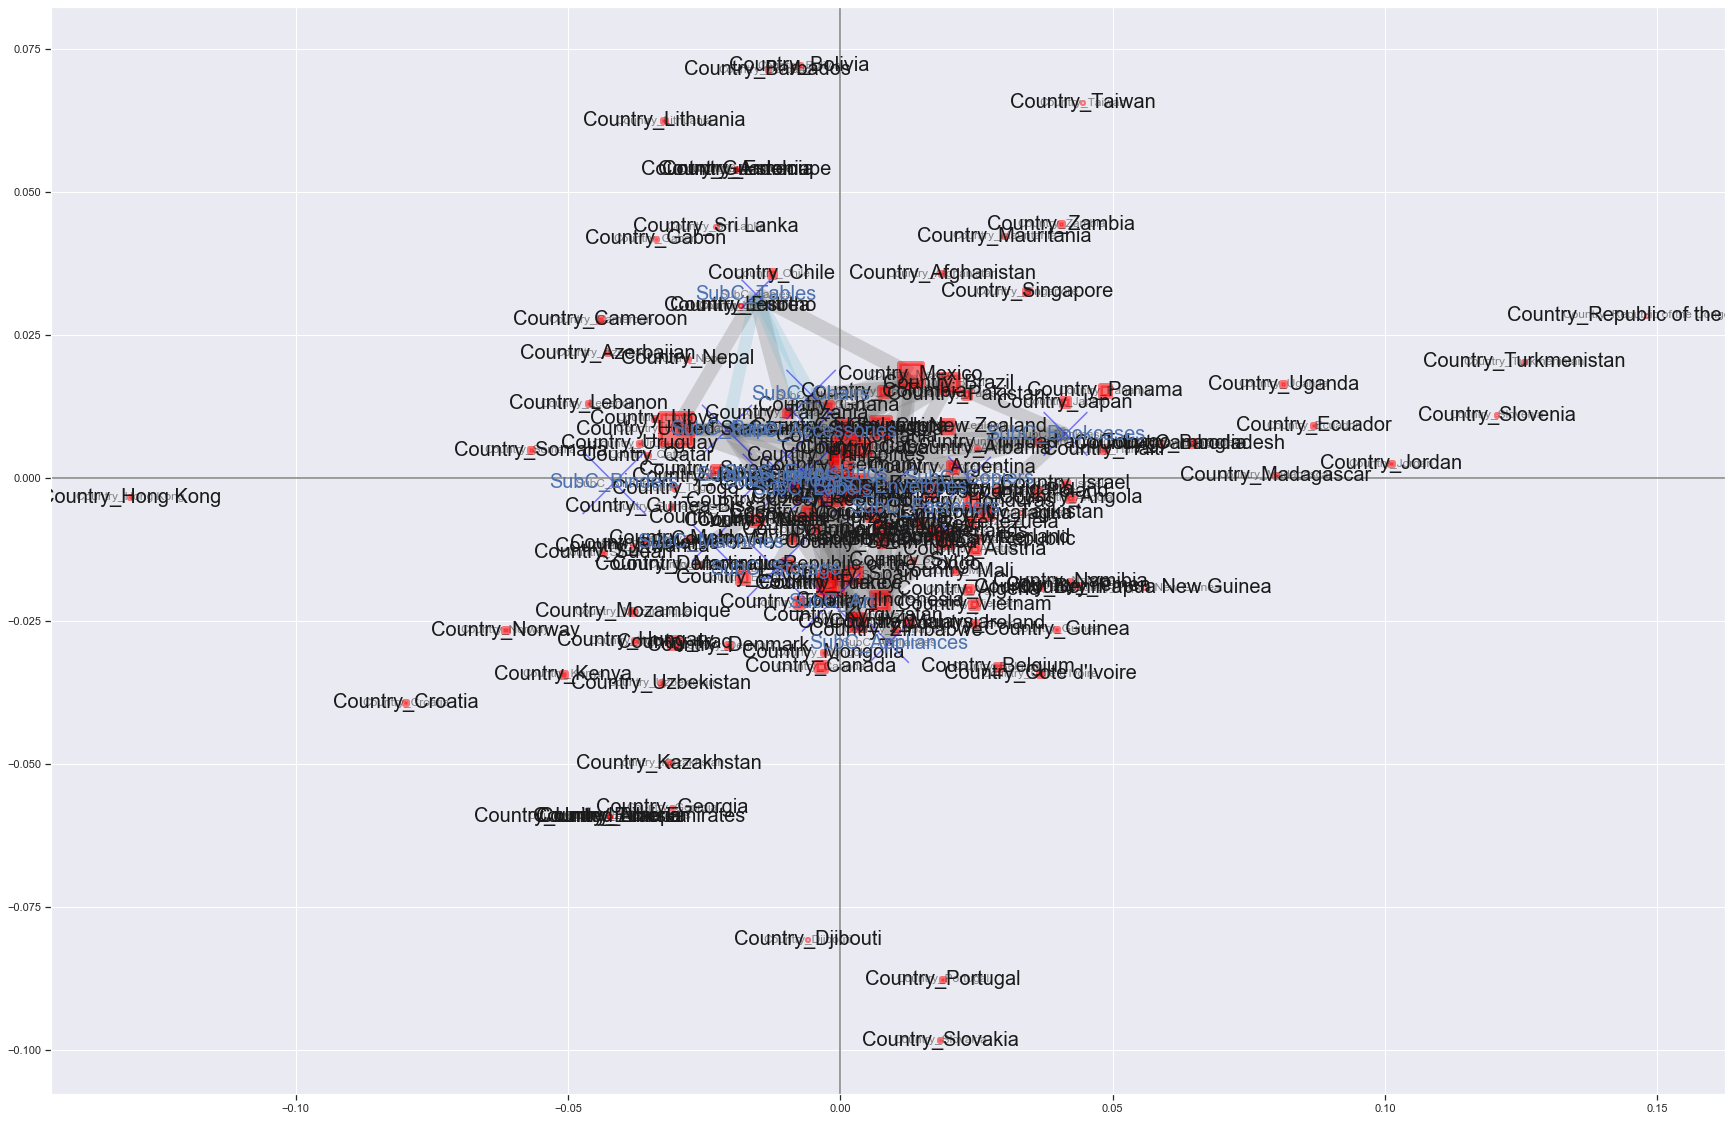

In [22]:
xlim=[None,None]
ylim=[None,None]
#xlim=[-0.05,0.05]
#ylim=[-0.05,0.05]
mca_association_plot(df_corre, df_label, rows, cols, new_labels2, strong_node_row=None, strong_node_col=None, xlim=xlim, ylim=ylim)

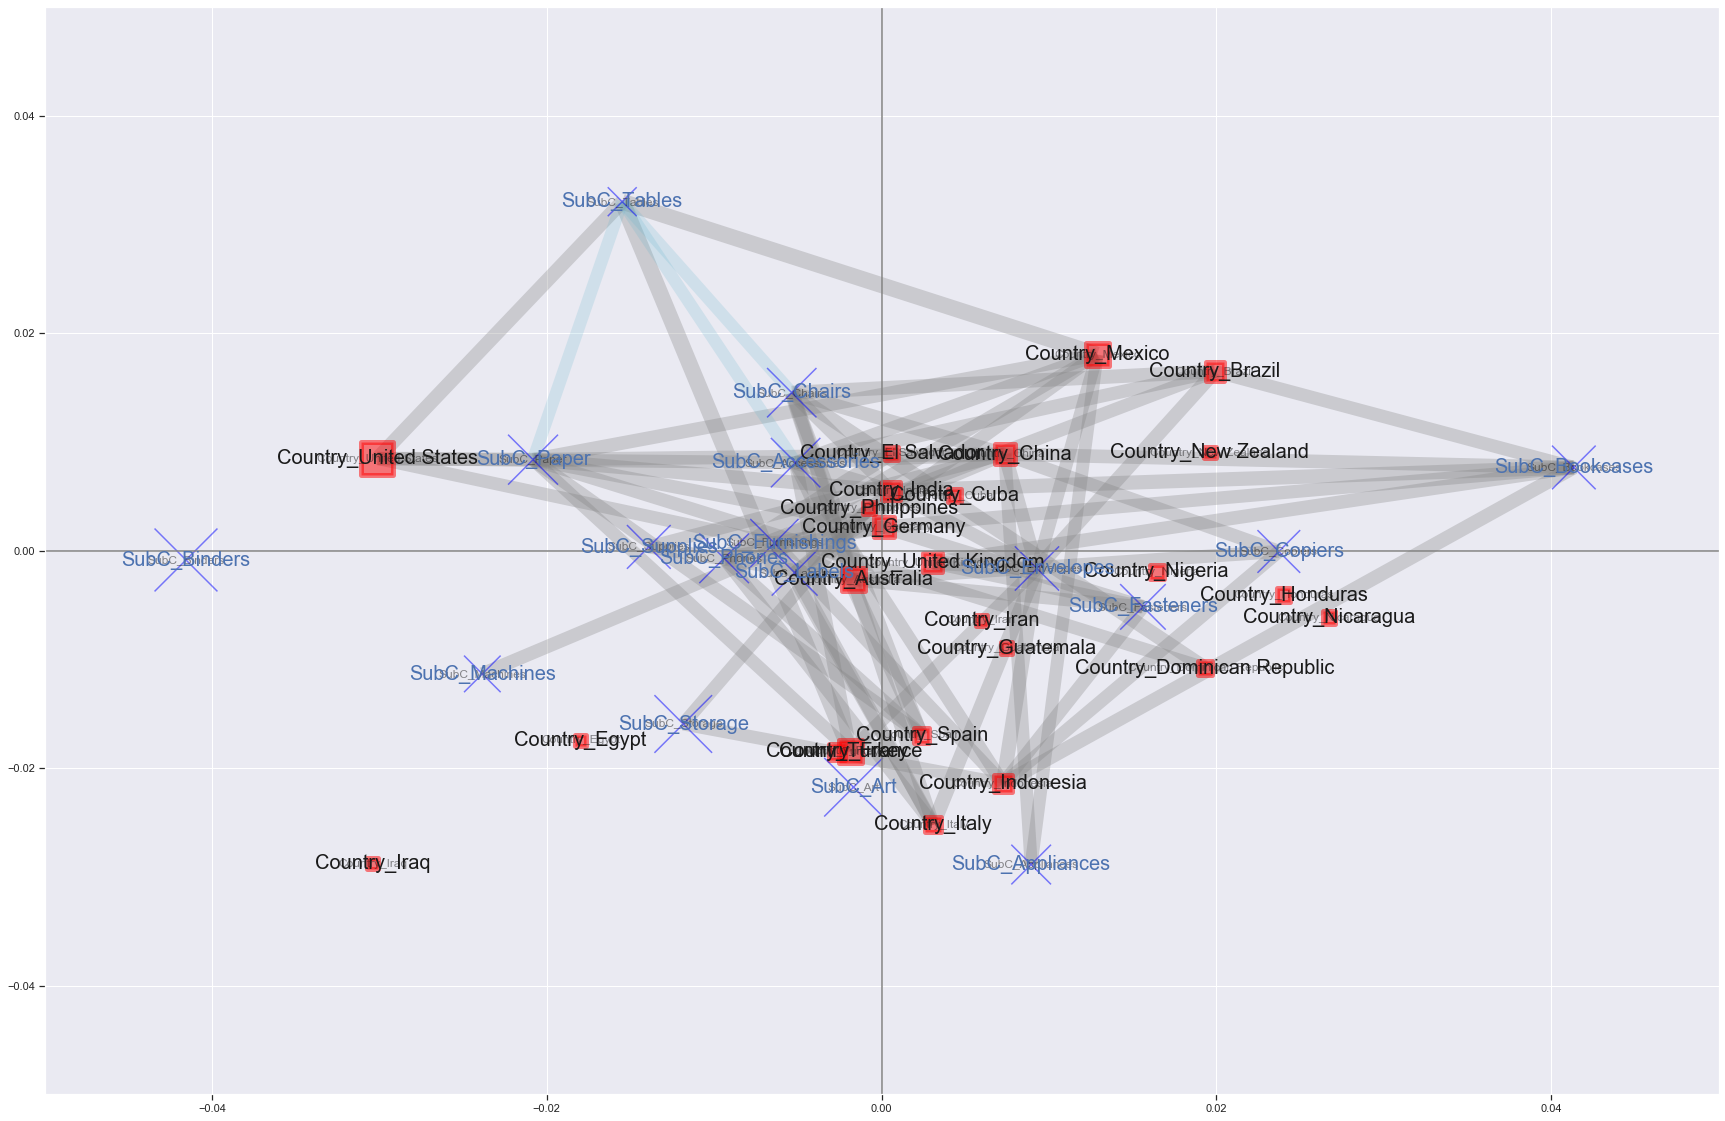

In [23]:
# 支持度0.05以上の項目だけ使う
strong_single_product=list(set([[j for j in i][0] for i in frequent_itemsets['itemsets']]))
strong_single_product=le.inverse_transform(strong_single_product)
row_word = 'Country_'
strong_node_row = [v for i, v in enumerate(strong_single_product) if row_word in v]
strong_node_col = [v for i, v in enumerate(strong_single_product) if row_word not in v]

xlim=[-0.05,0.05]
ylim=[-0.05,0.05]
mca_association_plot(df_corre, df_label, rows, cols, new_labels2, strong_node_row=strong_node_row, strong_node_col=strong_node_col, xlim=xlim, ylim=ylim)

In [74]:
# 固有値（eigenvalue）と寄与率（explained variance of eigen vectors）
data = np.array([mca_counts.L[:],
                 mca_counts.expl_var(greenacre=True, N=len(mca_counts.L[:])) * 100]).T
columns = ['value', 'ratio']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'
print ("Principal inertias(eigenvalues):")
display(table2)
print('\n', end='')

Principal inertias(eigenvalues):


,value,ratio
Factor,,
1,0.001104,36.202466
2,0.000820,26.887838
3,0.000258,8.460982
4,0.000179,5.870719
Σ,0.002361,77.422005


In [150]:
rules4['lift'].min()

0.7373444205053329